In [1]:
import zeldovich as z
import time
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'jet'
import numpy as np
import sys

In [21]:
GridSize = 256
RedShift = 0
XSize = 256
GridSize_cic=256

### Web Classification of the initial density field 

In [22]:
a = z.zeldovich(GridSize=GridSize, XSize = XSize,Seed = 300000)
kx,ky,kz = a.k_array()
psik_scalar = a.psik_scalar()
WebC = a.web_classification(psik_scalar,kx,ky,kz)

In [23]:
tid,eig =a.tidal_tensor(psik_scalar,kx,ky,kz)

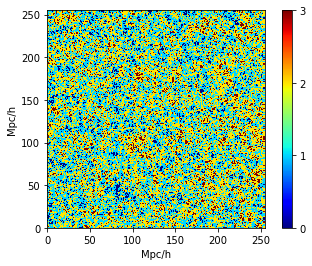

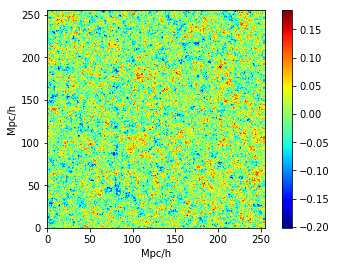

6.93635320663


In [24]:
timess=time.time()
x_array = a.x_range()
plt.pcolormesh(x_array,x_array,WebC[:,:,3])
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.colorbar(ticks=np.linspace(0,3,4))
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.show()
delx=a.initial_deltax()
plt.pcolormesh(x_array,x_array,delx[:,:,3])
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.colorbar()
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.show()
print time.time()-timess

### Web Classification at a smaller redshift

In [25]:
Position = a.Position(RedShift)

In [26]:
Lbox = a.XSize
PositionX = Position[0,:,:,:].flatten()
PositionY = Position[1,:,:,:].flatten()
PositionZ = Position[2,:,:,:].flatten()
intp = z.pmInterpolation()
deltaxf = intp.cic(PositionX,PositionY,PositionZ,Lbox,GridSize_cic)-1

In [27]:
deltakf = np.fft.rfftn(deltaxf)
ksq = a.ksquare()
psik_scalar = -deltakf/(ksq+1e-15)
WebCf = a.web_classification(psik_scalar,kx,ky,kz)

## Web Classification of Final Density Field 
### Color COding
###  0-Blue-Void
### 1-LightBlue-sheet
### 2-Yelow-filament
### 3-Red- Node

In [28]:
##Assigning bin number to the new displaced particles

dx = a.dx
inew = np.mod(np.floor(PositionX/dx),GridSize)
jnew = np.mod(np.floor(PositionY/dx),GridSize)
knew = np.mod(np.floor(PositionZ/dx),GridSize)
BinNumbernew = inew*GridSize**2  + GridSize *jnew + knew
ind = np.where((knew==0))[0]  ## find out particles in a particular cross section of the box


In [29]:
colors = plt.cm.jet(WebC.reshape([GridSize**3])/3.)
colors = colors[ind]
X = PositionX[ind]
Y = PositionY[ind]

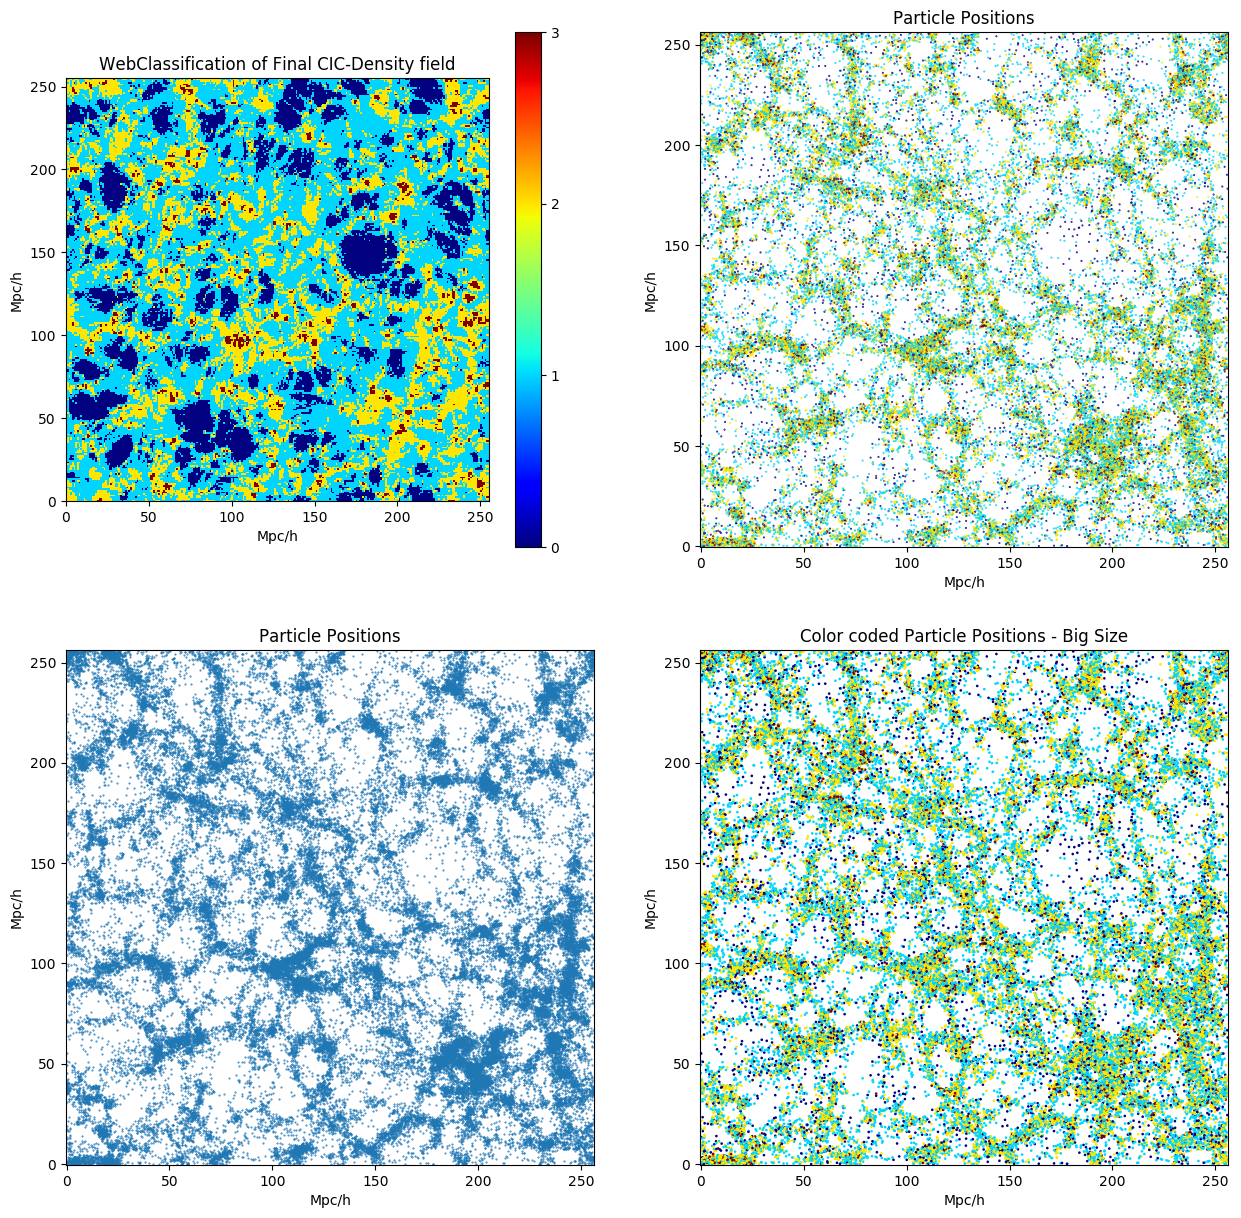

In [30]:
fig=plt.figure(figsize=(15,15), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(2,2,1)
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('WebClassification of Final CIC-Density field')
x_array = a.x_range()

plt.pcolor(x_array,x_array,WebCf[:,:,3])
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.colorbar(ticks=np.linspace(0,3,4))
#plt.gca().invert_yaxis()
#plt.scatter(Y,X,s=0.008,color='black')
plt.subplot(2,2,2)
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('Particle Positions')

plt.scatter(Y,X,s=.2,color=colors)
plt.axis([Y.min()-0.3, Y.max()+0.3, X.min()-0.3, X.max()+0.3])
plt.subplot(2,2,3)
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('Particle Positions')
plt.scatter(Y,X,s=.2)
plt.axis([Y.min()-0.3, Y.max()+0.3, X.min()-0.3, X.max()+0.3])
plt.subplot(2,2,4)
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.title('Color coded Particle Positions - Big Size')
plt.scatter(Y,X,s=.8,color=colors)
plt.axis([Y.min()-0.3, Y.max()+0.3, X.min()-0.3, X.max()+0.3])
plt.show()

### New Color Coding According to Webclassification final 

In [31]:

## All arrays flattened for ease
WebCf_flattened = WebCf.flatten()
WebC_flattened = WebC.flatten()
#### Color Coding 
#### Vd - Vd = 0
#### Vd - sh = 1
#### Vd - ft = 2
#### Vd - nd = 3
#### ft - Vd = 4
#### ft - sh = 5
#### ft - ft = 6
#### ft - nd = 7
#### sh - vd = 8
#### sh - sh = 9
#### sh - ft = 10
#### sh - nd = 11
#### nd - vd = 12
#### nd - sh = 13
#### nd - ft = 14
#### nd - nd = 15
WebCf_improv = np.ones([GridSize**3])*16
void_indices = np.where(WebC_flattened ==0)[0]
sheet_indices = np.where(WebC_flattened ==1)[0]
filament_indices = np.where(WebC_flattened ==2)[0]
node_indices = np.where(WebC_flattened ==3)[0]

WebCf_improv[void_indices[np.where((WebCf_flattened[BinNumbernew[void_indices].astype(int)]==0)==True)[0]]]=0
WebCf_improv[void_indices[np.where((WebCf_flattened[BinNumbernew[void_indices].astype(int)]==1)==True)[0]]]=1
WebCf_improv[void_indices[np.where((WebCf_flattened[BinNumbernew[void_indices].astype(int)]==2)==True)[0]]]=2
WebCf_improv[void_indices[np.where((WebCf_flattened[BinNumbernew[void_indices].astype(int)]==3)==True)[0]]]=3
WebCf_improv[filament_indices[np.where((WebCf_flattened[BinNumbernew[filament_indices].astype(int)]==0)==True)[0]]]=4
WebCf_improv[filament_indices[np.where((WebCf_flattened[BinNumbernew[filament_indices].astype(int)]==1)==True)[0]]]=5
WebCf_improv[filament_indices[np.where((WebCf_flattened[BinNumbernew[filament_indices].astype(int)]==2)==True)[0]]]=6
WebCf_improv[filament_indices[np.where((WebCf_flattened[BinNumbernew[filament_indices].astype(int)]==3)==True)[0]]]=7
WebCf_improv[sheet_indices[np.where((WebCf_flattened[BinNumbernew[sheet_indices].astype(int)]==0)==True)[0]]]=8
WebCf_improv[sheet_indices[np.where((WebCf_flattened[BinNumbernew[sheet_indices].astype(int)]==1)==True)[0]]]=9
WebCf_improv[sheet_indices[np.where((WebCf_flattened[BinNumbernew[sheet_indices].astype(int)]==2)==True)[0]]]=10
WebCf_improv[sheet_indices[np.where((WebCf_flattened[BinNumbernew[sheet_indices].astype(int)]==3)==True)[0]]]=11
WebCf_improv[node_indices[np.where((WebCf_flattened[BinNumbernew[node_indices].astype(int)]==0)==True)[0]]]=12
WebCf_improv[node_indices[np.where((WebCf_flattened[BinNumbernew[node_indices].astype(int)]==1)==True)[0]]]=13
WebCf_improv[node_indices[np.where((WebCf_flattened[BinNumbernew[node_indices].astype(int)]==2)==True)[0]]]=14
WebCf_improv[node_indices[np.where((WebCf_flattened[BinNumbernew[node_indices].astype(int)]==3)==True)[0]]]=15

### Fraction of Void/Filament/Sheet/Node

In [32]:
bincount = np.bincount(WebCf_improv.astype(int))
vd_vd = bincount[0]/float(GridSize**3)
vd_sh = bincount[1]/float(GridSize**3)
vd_ft = bincount[2]/float(GridSize**3)
vd_nd = bincount[3]/float(GridSize**3)
ft_vd = bincount[4]/float(GridSize**3)
ft_sh = bincount[5]/float(GridSize**3)
ft_ft = bincount[6]/float(GridSize**3)
ft_nd = bincount[7]/float(GridSize**3)
sh_vd = bincount[8]/float(GridSize**3)
sh_sh = bincount[9]/float(GridSize**3)
sh_ft = bincount[10]/float(GridSize**3)
sh_nd = bincount[11]/float(GridSize**3)
nd_vd = bincount[12]/float(GridSize**3)
nd_sh = bincount[13]/float(GridSize**3)
nd_ft = bincount[14]/float(GridSize**3)
nd_nd = bincount[15]/float(GridSize**3)

In [33]:
print vd_vd,ft_ft,sh_sh,nd_nd,vd_ft,vd_sh,vd_nd,ft_vd,ft_sh,ft_nd,sh_vd,sh_ft,sh_nd,nd_vd,nd_ft,nd_sh,nd_nd

0.00466698408127 0.248364090919 0.141339898109 0.0220652222633 0.0347105264664 0.0339173674583 0.00637704133987 0.00225937366486 0.0927373170853 0.0769340395927 0.00801473855972 0.220145344734 0.0507673025131 0.000102818012238 0.0473472476006 0.0102506875992 0.0220652222633


In [34]:
print vd_vd+vd_sh+vd_ft+vd_nd,sh_vd+sh_sh+sh_ft+sh_nd,ft_vd+ft_sh+ft_ft+ft_nd,nd_vd+nd_vd+nd_sh+nd_ft+nd_nd


0.0796719193459 0.420267283916 0.420294821262 0.0798687934875


In [35]:
Pn = 0.0796759
Pf = 0.420324  ## Values obtained by integrating Doroshkevich Probability in Mathematica

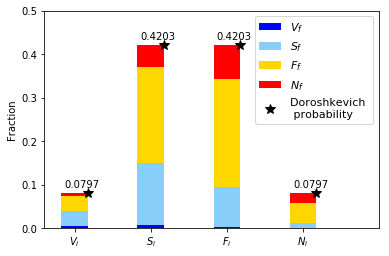

In [44]:
N = 4
Voidf = np.array([vd_vd,sh_vd,ft_vd,nd_vd])
Filamentf = np.array([vd_ft,sh_ft,ft_ft,nd_ft])
Sheetf = np.array([vd_sh,sh_sh,ft_sh,nd_sh])
Nodef = np.array([vd_nd,sh_nd,ft_nd,nd_nd])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind,Voidf, width, color='b')
p2 = plt.bar(ind, Sheetf, width,color='#87cefa',bottom=Voidf)
p3 = plt.bar(ind, Filamentf, width,color='#ffd700',bottom=Voidf+Sheetf)
p4 = plt.bar(ind, Nodef, width,color='r',bottom=Voidf+Filamentf+Sheetf)
plt.ylabel('Fraction')

P_theoretical = np.array([Pn,Pf,Pf,Pn])
plt.xticks(ind, ('$V_i$', '$S_i$', '$F_i$', '$N_i$'))
p5= plt.plot(ind+width/2.,P_theoretical,'*',markersize=10,color='black',label='Doroshkevich')

rects = p4.patches

# Now make some labels
labels = ["%.4f" % i for i in P_theoretical]
i=0
for rect, label in zip(rects, labels):
    height = P_theoretical[i]
    i+=1
    plt.text(rect.get_x()+0.1 + rect.get_width()/2, height +0.01, label, ha='center', va='bottom')




plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('$V_f$', '$S_f$','$F_f$','$N_f$','Doroshkevich \n probability'),prop={'size': 11})

#plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('$V_f$', '$S_f$','$F_f$','$N_f$'),prop={'size': 11})
plt.xlim([-0.4,4])
plt.ylim([0,.5])
plt.savefig('fracRSD'+str(RedShift)+'BoxSize'+str(XSize)+'GridSize_cic'+str(GridSize_cic)+'.png',dpi=200, bbox_inches='tight', pad_inches=0)
#plt.savefig('fracRS'+str(RedShift)+'BoxSize'+str(XSize)+'GridSize_cic'+str(GridSize_cic)+'.png',dpi=200, bbox_inches='tight', pad_inches=0)

plt.show()

[ 0.01504391  0.27824527  0.55056721  0.15614361]


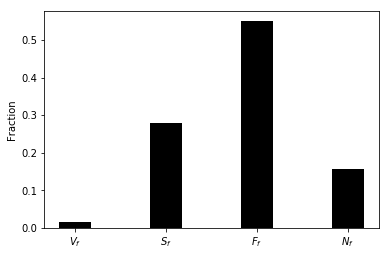

In [37]:
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
FinalFraction = np.array([np.sum(Voidf),np.sum(Sheetf),np.sum(Filamentf),np.sum(Nodef)])
print FinalFraction
p1 = plt.bar(ind,FinalFraction, width, color='black')

plt.ylabel('Fraction')


plt.xticks(ind, ('$V_f$', '$S_f$', '$F_f$', '$N_f$'))
plt.savefig('ffracRS'+str(RedShift)+'BoxSize'+str(XSize)+'GridSize_cic'+str(GridSize_cic)+'.png',dpi=200, bbox_inches='tight', pad_inches=0)

plt.show()

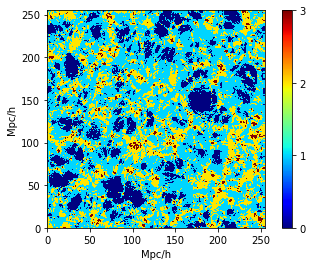

In [38]:
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.pcolor(x_array,x_array,WebCf[:,:,3])
plt.axis([x_array.min(), x_array.max(), x_array.min(), x_array.max()])
plt.gca().set_aspect('equal')
plt.colorbar(ticks=np.linspace(0,3,4))
plt.show()
#plt.gca().invert_yaxis()
#plt.scatter(Y,X,s=0.008,color='black')

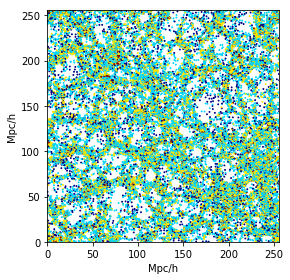

In [41]:
plt.xlabel('Mpc/h')
plt.ylabel('Mpc/h')
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(Y,X,s=.8,color=colors,alpha=1)
plt.axis([Y.min(), Y.max(), X.min(), X.max()])
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig('ppcc.png',dpi=100,bbox_inches='tight', pad_inches=0)

plt.show()

In [40]:
print RedShift

0
